# Loading Packages 

In [2]:
import os
import pandas as pd
import numpy as np

# Date & Problem statement

In [3]:
"""
Data Dictionary 

month_start_date : monthly sales upto the date
whidx : Warehouse ID
skuidx : SKU ID 
qty : Quantity Sold

"""

"""
Problem Statement : 
For a given date, warehouse ID & sku id we have to forecast the 
quantity demanded by the consumers at stores. 

"""
monthdata = pd.read_csv('monthsummary_top50_v2.csv',infer_datetime_format= True)
monthdata.head(5)

,month_start_date,whidx,skuidx,qty
0,2019-07-01,70401,3269615,5
1,2019-08-01,70401,3269615,16
2,2019-09-01,70401,3269615,16
3,2019-10-01,70401,3269615,12
4,2019-11-01,65227,3269615,2


In [23]:
monthdata.shape[0]

108

# Functions for Data Exploration :

In [4]:
def missing_(data,colname):
    missing_ = data[colname].isna().sum()
    return missing_

def unique_(data,colname):
    unique_ = len(data[colname].unique())
    return unique_

def date_duration(data,colname):
    
    date_vector = data[colname]
    date_vector = pd.to_datetime(date_vector)
    min_ = date_vector.min()
    max_ = date_vector.max()
    
    return print(f"Temporal duration is from {min_} to {max_}")

def sku_WHCount(data,colname1,colname2):
    
    datum = data.groupby(colname1).agg(skus = pd.NamedAgg(colname2,'nunique')).reset_index()
    datum = datum.sort_values('skus', ascending = False)
    datum = pd.DataFrame(datum)
    
    return datum

def demand_dept(data,colname):
    
    min_demand = data[colname].min()
    max_demand = data[colname].max()
    avg_demand = data[colname].mean()
    
    return print(f"Min Demand {min_demand} , Max_Demand {max_demand} & Avg Demand {avg_demand}")

# Missing Information:

In [30]:
""" Asma's assignment """
unique_(monthdata,'whidx')
#unique_(monthdata,'skuidx')

31

# Warehouse & SKU level Demand Analysis:

In [5]:
sku_WHCount(monthdata,'whidx','skuidx')

,whidx,skus
18,65245,6
9,37163,3
8,34122,3
27,75187,3
5,13607,3
19,65247,2
20,65249,2
23,69100,2
30,82290,2
7,16742,2


# Consolidated demand for each SKU for a given warehouse 

In [6]:
wskudemand = monthdata.groupby(['whidx','skuidx']).agg(total_demand = pd.NamedAgg('qty','sum')).reset_index()
targetwh = wskudemand.loc[wskudemand['whidx'] == 13607].sort_values('total_demand',ascending = False)
max_demand = wskudemand.loc[wskudemand['whidx'] == 13607].sort_values('total_demand',ascending = False).max()
max_demand[2]
targetwh.loc[targetwh['total_demand'] == max_demand[2]].reset_index()['skuidx'][0]

3205752

In [7]:
monthdata['whidx'] = monthdata['whidx'].astype(str)
monthdata['whidx']

0      70401
1      70401
2      70401
3      70401
4      65227
       ...  
103    75187
104    75187
105    80704
106    81490
107    82290
Name: whidx, Length: 108, dtype: object

In [14]:

def targetskus(data,whidx):
    wskudemand = data.groupby(['whidx','skuidx']).agg(total_demand = pd.NamedAgg('qty','sum')).reset_index()
    targetwh = wskudemand.loc[wskudemand['whidx'] == whidx].sort_values('total_demand',ascending = False)
    max_demand = wskudemand.loc[wskudemand['whidx'] == whidx].sort_values('total_demand',ascending = False).max()
    max_demand = max_demand[2]
    sku = targetwh.loc[targetwh['total_demand'] == max_demand].reset_index()['skuidx'][0]
    
    return sku,max_demand

    

In [17]:
targets = pd.DataFrame(columns = ['whidx','skuidx','demand'])
for wid in list(monthdata.whidx.unique()):
    targetsku,demand = targetskus(monthdata,wid)
    datum = pd.DataFrame({'whidx':wid,
                          'skuidx':targetsku,
                          'demand':demand},index = [0])
    targets = pd.concat([targets,datum])
    print(f"processing targets for {wid}")

processing targets for 70401
processing targets for 65227
processing targets for 2517
processing targets for 4643
processing targets for 37163
processing targets for 60182
processing targets for 65245
processing targets for 68500
processing targets for 75184
processing targets for 7997
processing targets for 34122
processing targets for 52420
processing targets for 65941
processing targets for 82290
processing targets for 81490
processing targets for 5156
processing targets for 65244
processing targets for 69100
processing targets for 70360
processing targets for 75187
processing targets for 80704
processing targets for 2518
processing targets for 13607
processing targets for 15942
processing targets for 16742
processing targets for 52720
processing targets for 65240
processing targets for 65241
processing targets for 65243
processing targets for 65247
processing targets for 65249


In [18]:
targets.sort_values('demand',ascending = False)

,whidx,skuidx,demand
0,65247,3159035,11709
0,69100,3158784,2510
0,65245,3158784,2459
0,65241,3158784,2050
0,16742,3163649,1330
0,75187,3205720,990
0,65244,3158784,909
0,65249,3158784,819
0,13607,3205752,325
0,70401,3269615,246


In [20]:
""" let us assume that we need to target skus with 
    more than 500 units of demand in the last 16 months 
"""

skutargets  = list(targets.loc[targets['demand'] > 500].skuidx.unique())
skutargets

[3158784, 3205720, 3163649, 3159035]

In [25]:
monthdata.loc[monthdata['skuidx'] == skutargets[3]]

,month_start_date,whidx,skuidx,qty
93,2020-12-01,65247,3159035,11709


In [ ]:
""" Asma's Assignment """

In [10]:
!pip install statsmodels


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Creating the masterdata:

In [27]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
monthdata.loc[monthdata['qty'] < 0]

,month_start_date,whidx,skuidx,qty
11,2020-05-01,65227,3269615,-2


In [6]:
monthdata.loc[monthdata['qty'] == 0]

,month_start_date,whidx,skuidx,qty
10,2020-02-01,70401,3269615,0


In [21]:
masterdata = monthdata.loc[(monthdata['qty'] != 0) & (monthdata['qty'] != -2)]
data_3158784 = masterdata.loc[masterdata['skuidx'] == skutargets[0]]
data_3158784.shape

(7, 4)

In [57]:
masterdata['month_start_date'] = pd.to_datetime(masterdata['month_start_date'])
masterdata = masterdata.sort_values('month_start_date',ascending = True)

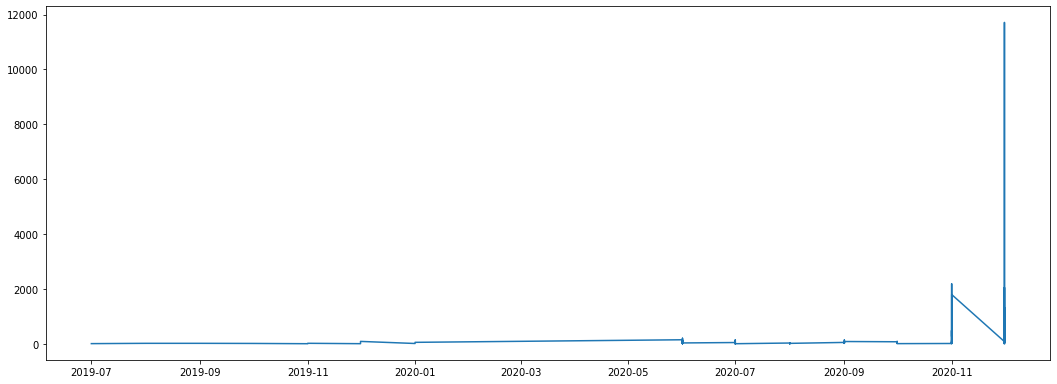

In [58]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,6.5)
plt.plot(masterdata.month_start_date,masterdata.qty)

In [28]:
import statsmodels
from statsmodels.tsa.stattools import adfuller
adfuller(masterdata['qty'])

""" p-value of augmented dickey fuller test for stationarity """
p_value = adfuller(masterdata['qty'])[1]
p_value < 0.05


""" as the time series is stationary , the value of d = 0 for ARIMA(p,d,q) """

True

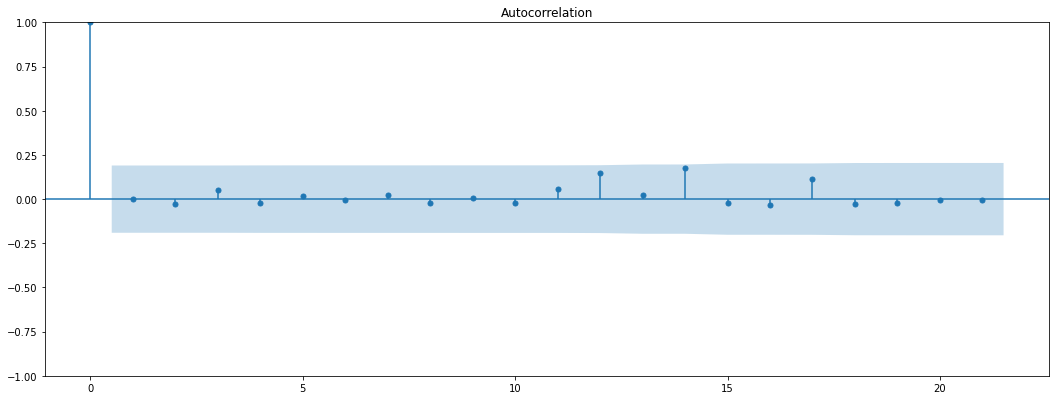

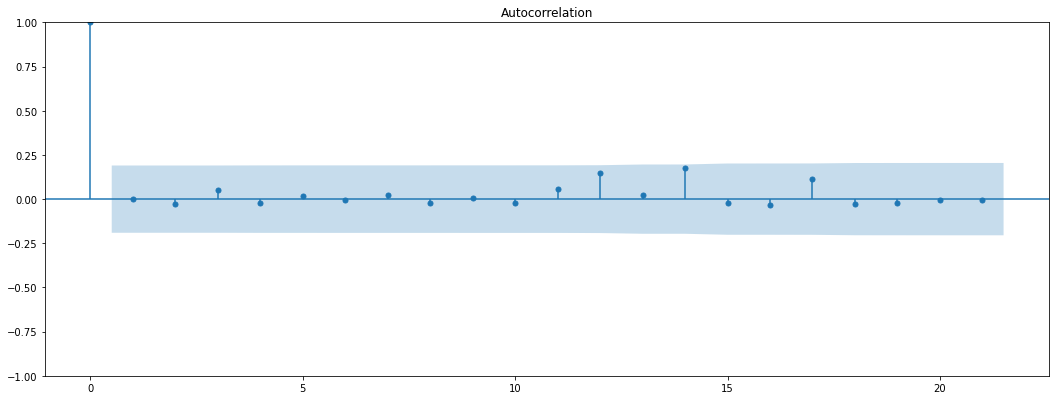

In [59]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
masterdata = masterdata.sort_values('month_start_date',ascending = True)
plot_acf(masterdata.qty)

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


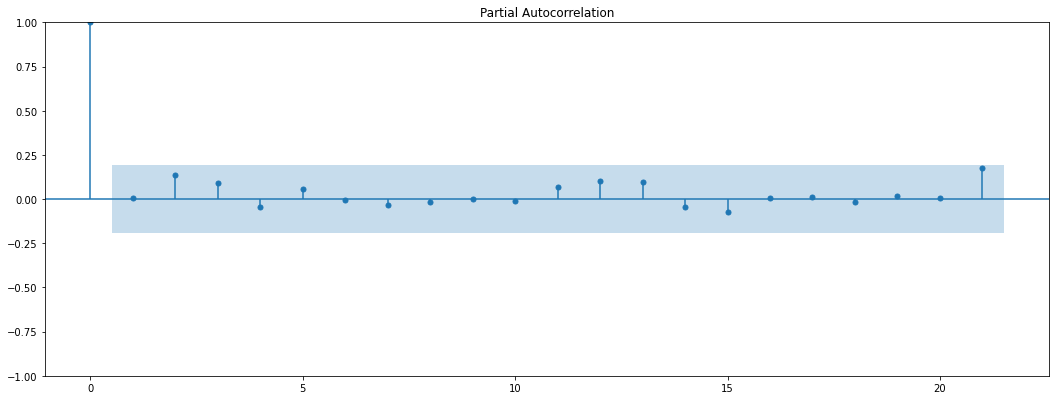

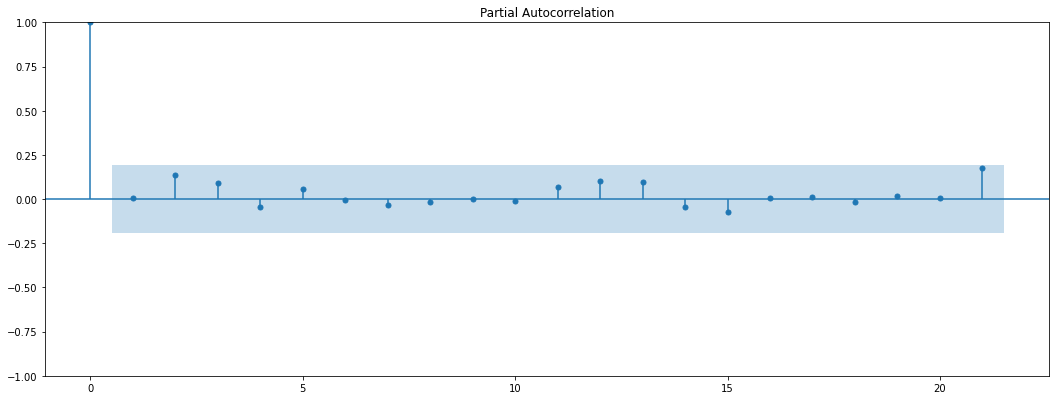

In [60]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
masterdata = masterdata.sort_values('month_start_date',ascending = True)
plot_pacf(masterdata.qty)

# temporal split : train & test

In [64]:
masterdata.month_start_date.sort_values(ascending = True).unique()

array(['2019-07-01T00:00:00.000000000', '2019-08-01T00:00:00.000000000',
       '2019-09-01T00:00:00.000000000', '2019-10-01T00:00:00.000000000',
       '2019-11-01T00:00:00.000000000', '2019-12-01T00:00:00.000000000',
       '2020-01-01T00:00:00.000000000', '2020-06-01T00:00:00.000000000',
       '2020-07-01T00:00:00.000000000', '2020-08-01T00:00:00.000000000',
       '2020-09-01T00:00:00.000000000', '2020-10-01T00:00:00.000000000',
       '2020-11-01T00:00:00.000000000', '2020-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [67]:
train = masterdata.loc[masterdata['month_start_date'] <= '2020-11-01T00:00:00.000000000']
test = masterdata.loc[masterdata['month_start_date'] > '2020-11-01T00:00:00.000000000']
print(f" train :{train.shape} & test : {test.shape}")

 train :(71, 4) & test : (35, 4)


In [77]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
input_array = np.array(train.qty)
model = SARIMAX(input_array, order=(3,0,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   71
Model:               SARIMAX(3, 0, 2)   Log Likelihood                -504.009
Date:                Thu, 11 Aug 2022   AIC                           1020.017
Time:                        21:03:34   BIC                           1033.593
Sample:                             0   HQIC                          1025.416
                                 - 71                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1230      0.243     -0.507      0.612      -0.598       0.352
ar.L2          0.6693      0.168      3.990      0.000       0.341       0.998
ar.L3          0.4078      0.212      1.922      0.0

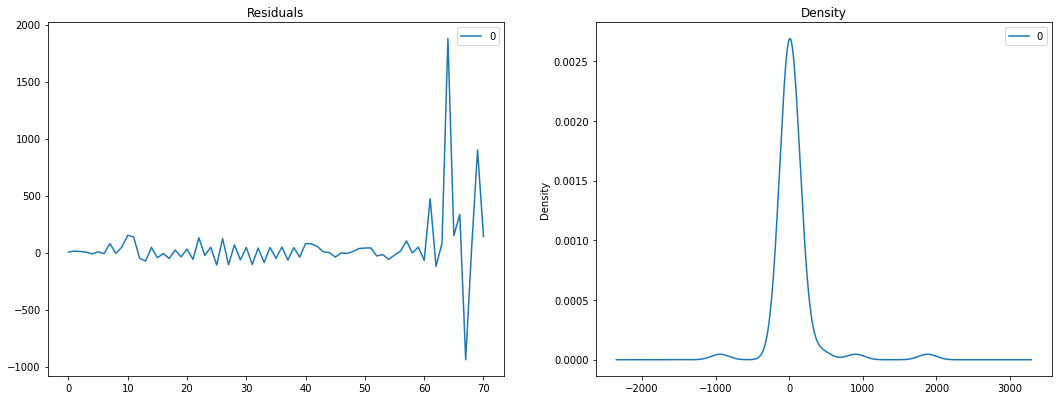

In [78]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()